In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


In [54]:
print(cities)

['tasiilaq', 'castro', 'kegayli', 'taolanaro', 'busselton', 'soyo', 'rikitea', 'avarua', 'jamestown', 'mehamn', 'port ellen', 'ponta do sol', 'tsihombe', 'kahului', 'bluff', 'gavrilovka vtoraya', 'faanui', 'manta', 'nizhneyansk', 'mount gambier', 'chokurdakh', 'jalu', 'mungwi', 'beringovskiy', 'belmonte', 'tselinnoye', 'srandakan', 'georgetown', 'murgab', 'mar del plata', 'hobyo', 'saint-philippe', 'avera', 'ayr', 'awjilah', 'vestmannaeyjar', 'butaritari', 'krasnokamensk', 'newport', 'hobart', 'cape town', 'hithadhoo', 'barrow', 'atuona', 'kemijarvi', 'thinadhoo', 'wulanhaote', 'tamandare', 'lagoa', 'qaanaaq', 'kurumkan', 'bredasdorp', 'zheleznogorsk', 'baiquan', 'berbera', 'nome', 'hole narsipur', 'thompson', 'narsaq', 'kogon', 'port alfred', 'abu kamal', 'nueva guinea', 'puerto ayora', 'burica', 'ilebo', 'aripuana', 'cidreira', 'jabiru', 'geraldton', 'tuktoyaktuk', 'constitucion', 'punta arenas', 'kapaa', 'cabo san lucas', 'ushuaia', 'rocha', 'meyungs', 'vardo', 'hermanus', 'yulara',

In [55]:
# Set the API base URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
q_url = f"{url}appid={weather_api_key}&units=metric&q="

In [56]:
# response = requests.get(q_url + city).json()
# pprint(response)

In [57]:
# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lan = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Create counters
record_count = 1
set_count = 1

In [58]:
enumerate(cities)

In [59]:
# for i, city in enumerate(cities):
#     try:
#         response = requests.get(q_url +  city).json()
        

In [60]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#cities = cities[0:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"City not found. Skipping... {str(err)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | kegayli
City not found. Skipping... 'coord'
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping... 'coord'
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | soyo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | port ellen
City not found. Skipping... 'coord'
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping... 'coord'
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | gavrilovka vtoraya
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | manta
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping.

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          527
Lat           527
Lng           527
Max Temp      527
Humidity      527
Cloudiness    527
Wind Speed    527
Country       527
Date          527
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,-4.91,96,100,2.03,GL,1675639615
1,castro,-24.7911,-50.0119,18.62,78,56,2.45,BR,1675639571
2,busselton,-33.6500,115.3333,20.07,75,26,4.64,AU,1675639789
3,soyo,-6.1349,12.3689,25.76,84,88,2.38,AO,1675639827
4,rikitea,-23.1203,-134.9692,26.17,74,3,6.78,PF,1675639557


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,-4.91,96,100,2.03,GL,1675639615
1,castro,-24.7911,-50.0119,18.62,78,56,2.45,BR,1675639571
2,busselton,-33.6500,115.3333,20.07,75,26,4.64,AU,1675639789
3,soyo,-6.1349,12.3689,25.76,84,88,2.38,AO,1675639827
4,rikitea,-23.1203,-134.9692,26.17,74,3,6.78,PF,1675639557


In [65]:
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
522,nador,35.1740,-2.9287,15.14,77,75,4.12,MA,1675640007
523,upington,-28.4478,21.2561,22.21,73,0,0.51,ZA,1675639979
524,uige,-7.6087,15.0613,18.79,93,98,0.31,AO,1675640008
525,goshogawara,40.8044,140.4414,1.39,82,99,1.71,JP,1675639766
526,peniche,39.3558,-9.3811,9.20,63,1,3.20,PT,1675639756


In [66]:
# Get the time from DT 
date = city_data_df["Date"]
 
unixToDatetime = datetime.datetime.fromtimestamp(date[0]) # Unix Time
print(unixToDatetime)

2023-02-05 18:26:55


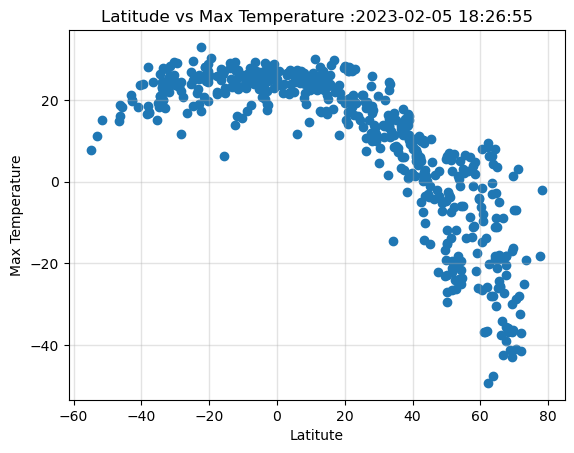

In [82]:
# Build scatter plot for latitude vs. temperature
x_ax = city_data_df["Lat"]
y_ax = city_data_df["Max Temp"]
plt.xlabel("Latitute")
plt.ylabel("Max Temperature")
plt.title(f"Latitude vs Max Temperature :{unixToDatetime}")
plt.scatter(x_ax, y_ax, marker="o", label="Cities")

# YOUR CODE HERE

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

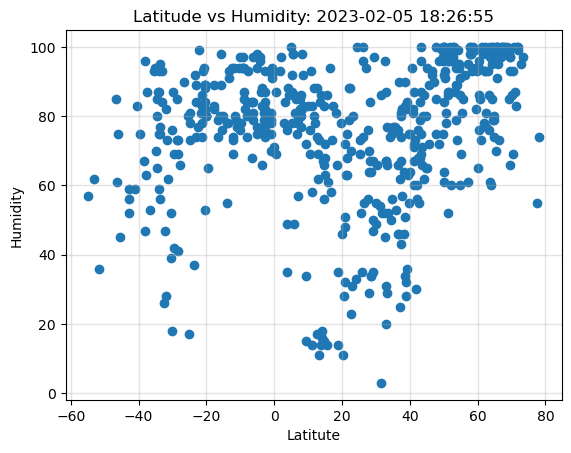

In [83]:
# Build the scatter plots for latitude vs. humidity
x_ax1 = city_data_df["Lat"]
y_ax1 = city_data_df["Humidity"]
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity: {unixToDatetime}")
plt.scatter(x_ax1, y_ax1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

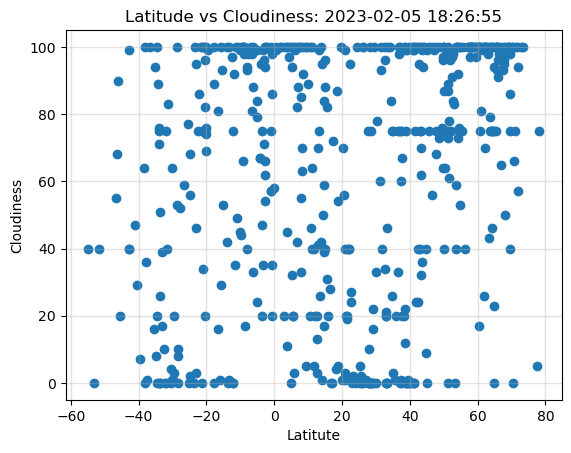

In [84]:
# Build the scatter plots for latitude vs. cloudiness
x_ax2 = city_data_df["Lat"]
y_ax2 = city_data_df["Cloudiness"]
plt.xlabel("Latitute")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness: {unixToDatetime}")
plt.scatter(x_ax2, y_ax2, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

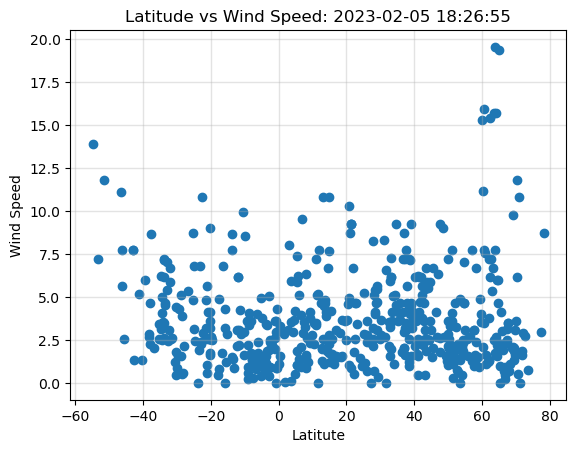

In [85]:
# Build the scatter plots for latitude vs. wind speed
x_ax2 = city_data_df["Lat"]
y_ax2 = city_data_df["Wind Speed (meter/sec)"]
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed: {unixToDatetime}")
plt.scatter(x_ax2, y_ax2, marker="o", label="Cities")

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [86]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]

In [87]:
# Sample northern hemi
northern_hemi.sample(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
69,vardo,70.3705,31.1107,-7.01,93,100,11.83,NO,1675639705
411,kenai,60.5544,-151.2583,-1.62,76,100,15.95,US,1675639965
247,balabac,7.9868,117.0645,26.56,80,55,6.33,PH,1675639449
133,roald,62.5833,6.1333,6.16,81,100,7.20,NO,1675639861
445,les cayes,18.2000,-73.7500,23.62,81,4,2.88,HT,1675639975
417,faya,18.3851,42.4509,11.29,66,87,1.48,SA,1675639967
137,khatanga,71.9667,102.5000,-37.12,99,57,2.89,RU,1675639667
40,thinadhoo,0.5333,72.9333,27.05,69,100,3.32,MV,1675639838
319,mogzon,51.7435,111.9606,-26.51,100,96,1.55,RU,1675639928


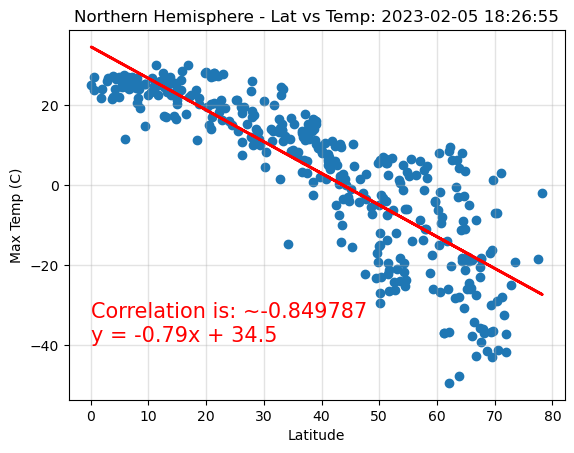

In [121]:
# Linear regression on Northern Hemisphere Lat vs Temp
x_ax = northern_hemi["Lat"]
y_ax = northern_hemi["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Northern Hemisphere - Lat vs Temp: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax, y_ax)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax, y_ax)
d_fit = d_slope * x_ax + d_int
# Plot the main scatter.
plt.scatter(x_ax, y_ax)
# Plot the line.
plt.plot(x_ax ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (0,-39), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(0, -33, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()


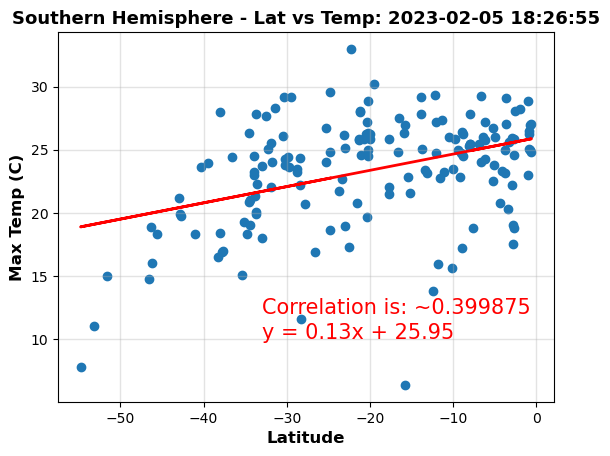

In [109]:
# Linear regression on Southern Hemisphere Lat vs Temp
x_ax1 = southern_hemi["Lat"]
y_ax1 = southern_hemi["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Southern Hemisphere - Lat vs Temp: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax1, y_ax1)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax1, y_ax1)
d_fit = d_slope * x_ax1 + d_int
# Plot the main scatter.
plt.scatter(x_ax1, y_ax1)
# Plot the line.
plt.plot(x_ax1 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-33, 10), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-33, 12, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

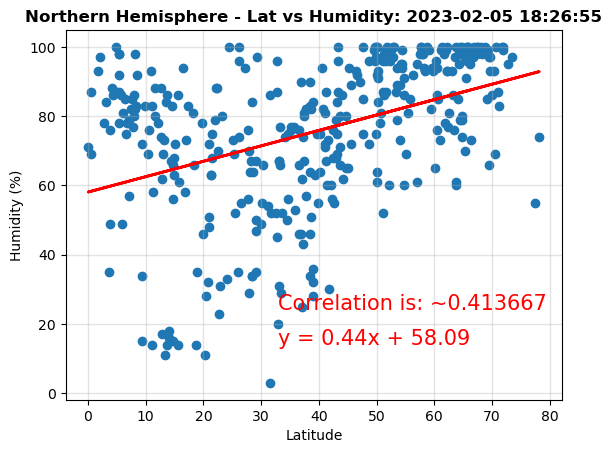

In [122]:
# Linnear Regression Northern Hemisphere
x_ax2 = northern_hemi["Lat"]
y_ax2 = northern_hemi["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax2, y_ax2)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax2, y_ax2)
d_fit = d_slope * x_ax2 + d_int
# Plot the main scatter.
plt.scatter(x_ax2, y_ax2)
# Plot the line.
plt.plot(x_ax2 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 24, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

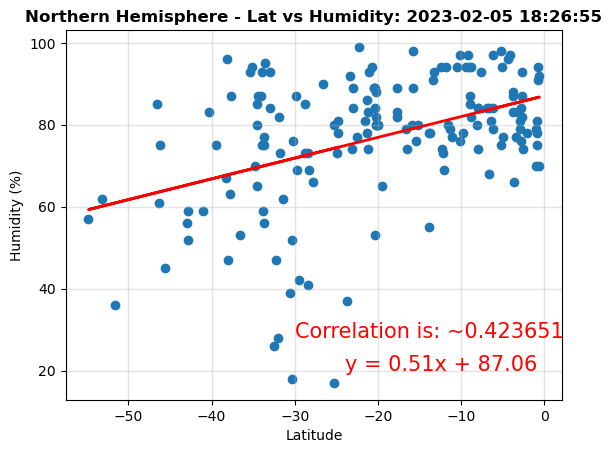

In [123]:
# Linnear Regression Southern Hemisphere for Lat vs Humidity
x_ax3 = southern_hemi["Lat"]
y_ax3 = southern_hemi["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax3, y_ax3)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax3, y_ax3)
d_fit = d_slope * x_ax3 + d_int
# Plot the main scatter.
plt.scatter(x_ax3, y_ax3)
# Plot the line.
plt.plot(x_ax3 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-24, 20), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 28, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()
# YOUR CODE HERE

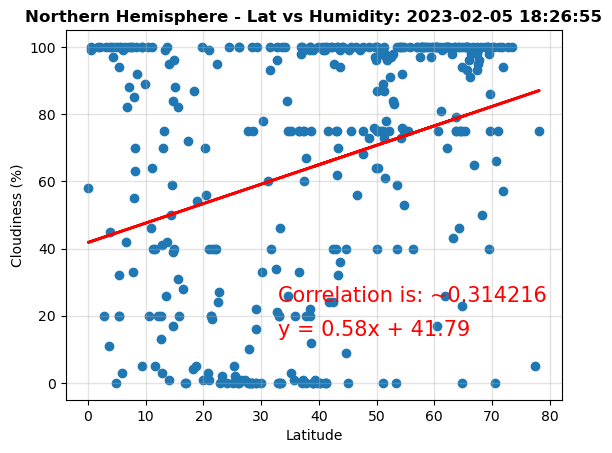

In [124]:
# Northern Hemisphere
# Linnear Regression Northern Hemisphere Lat vs Cloudiness
x_ax4 = northern_hemi["Lat"]
y_ax4 = northern_hemi["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Lat vs Humidity: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax4, y_ax4)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax4, y_ax4)
d_fit = d_slope * x_ax4 + d_int
# Plot the main scatter.
plt.scatter(x_ax4, y_ax4)
# Plot the line.
plt.plot(x_ax4 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 24, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

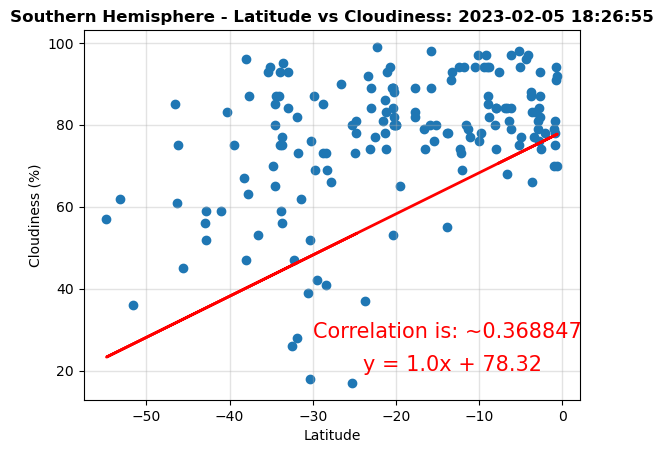

In [125]:
# Southern Hemisphere Lat vs Cloudiness
x_ax5 = southern_hemi["Lat"]
y_ax5 = southern_hemi["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Latitude vs Cloudiness: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax5, y_ax5)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax5, y_ax5)
d_fit = d_slope * x_ax5 + d_int
# Plot the main scatter.
plt.scatter(x_ax5, y_ax3)
# Plot the line.
plt.plot(x_ax5 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-24, 20), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 28, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()


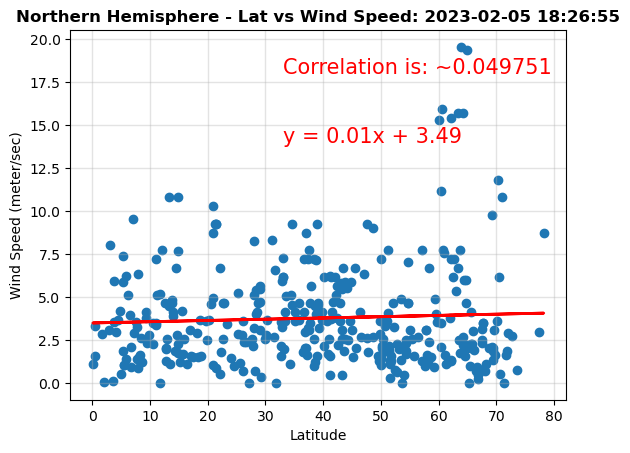

In [126]:
# Northern Hemisphere
x_ax6 = northern_hemi["Lat"]
y_ax6 = northern_hemi["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title(f"Northern Hemisphere - Lat vs Wind Speed: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax6, y_ax6)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax6, y_ax6)
d_fit = d_slope * x_ax6 + d_int
# Plot the main scatter.
plt.scatter(x_ax6, y_ax6)
# Plot the line.
plt.plot(x_ax6 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (33, 14), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(33, 18, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

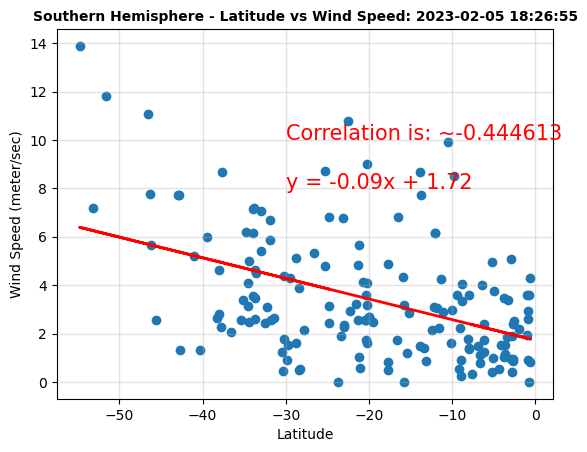

In [129]:
# Southern Hemisphere
x_ax7 = southern_hemi["Lat"]
y_ax7 = southern_hemi["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title(f"Southern Hemisphere - Latitude vs Wind Speed: {unixToDatetime}",fontsize = 10, fontweight="bold")
# Correlation.
corr1 = st.pearsonr(x_ax7, y_ax7)
# Linear Regression.
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(x_ax7, y_ax7)
d_fit = d_slope * x_ax5 + d_int
# Plot the main scatter.
plt.scatter(x_ax7, y_ax7)
# Plot the line.
plt.plot(x_ax7 ,d_fit,"r-", linewidth=2)
# get the equation and text generated into variables to display later to chart.
line_eq = "y = " + str(round(d_slope,2)) + "x + " + str(round(d_int,2))
line_eq1 = "Correlation is: ~" + str(round(corr1[0],6))
# add the line equation to the chart.
plt.annotate(line_eq, (-30, 8), fontsize=15,color="red")
# add the Correlation to the chart.
plt.text(-30, 10, line_eq1, fontsize=15,color="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# Show the graph
plt.show()

In [81]:
#Add discussion about the linear relationship
# The main takeaway from the data is that because we are randomly generating the locations and the chg
